In [33]:
!mlflow --version

mlflow, version 2.3.2


In [34]:
def load_data(url):
    import pandas as pd
    # Load dataset
    data = pd.read_csv(filepath_or_buffer=url,sep=',')
    return data

In [35]:
def train_test_split(final_data,target_column):
    from sklearn.model_selection import train_test_split
    X = final_data.loc[:, final_data.columns != target_column]
    y = final_data.loc[:, final_data.columns == target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=47)
    return X_train, X_test, y_train, y_test

In [36]:
def training_basic_classifier(X_train,y_train):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression()
    classifier.fit(X_train,y_train)
    
    return classifier

In [37]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [38]:
def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

In [39]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred,average='micro')
    recall = recall_score(y_true, y_pred,average='micro')
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [40]:
def create_roc_auc_plot(clf, X_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    metrics.plot_roc_curve(clf, X_data, y_data) 
    plt.savefig('roc_auc_curve.png')

In [41]:
def create_confusion_matrix_plot(clf, X_test, y_test):
    import matplotlib.pyplot as plt
    #from sklearn.metrics import plot_confusion_matrix
    from sklearn import metrics
    #plot_confusion_matrix(clf, X_test, y_test)
    metrics.ConfusionMatrixDisplay.from_predictions(y_pred=y_pred,y_true=y_test) 
    plt.savefig('confusion_matrix.png')

In [42]:
url = 'https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/iris.csv'
data = load_data(url)
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
target_column = 'class'
X_train, X_test, y_train, y_test = train_test_split(data, target_column)

In [44]:
X_test.head()

,sepal-length,sepal-width,petal-length,petal-width
26,5.0,3.4,1.6,0.4
41,4.5,2.3,1.3,0.3
49,5.0,3.3,1.4,0.2
44,5.1,3.8,1.9,0.4
141,6.9,3.1,5.1,2.3


In [45]:
model = training_basic_classifier(X_train,y_train)

C:\Users\Raghu Prasad\anaconda3\envs\mlflowsandbox\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Raghu Prasad\anaconda3\envs\mlflowsandbox\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
target_column = 'class'
X_train, X_test, y_train, y_test = train_test_split(data, target_column)

In [47]:
X_test.head()

,sepal-length,sepal-width,petal-length,petal-width
26,5.0,3.4,1.6,0.4
41,4.5,2.3,1.3,0.3
49,5.0,3.3,1.4,0.2
44,5.1,3.8,1.9,0.4
141,6.9,3.1,5.1,2.3


In [48]:
model = training_basic_classifier(X_train,y_train)

C:\Users\Raghu Prasad\anaconda3\envs\mlflowsandbox\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Raghu Prasad\anaconda3\envs\mlflowsandbox\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
y_pred = predict_on_test_data(model,X_test)
print(y_pred)
y_pred_prob = predict_prob_on_test_data(model,X_test)
print(y_pred_prob)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']
[[9.60709891e-01 3.92891099e-02 9.98775369e-07]
 [9.34702321e-01 6.52970795e-02 5.99766637e-07]
 [9.70974201e-01 2.90255406e-02 2.58846339e-07]
 [9.54953638e-01 4.50438801e-02 2.48162568e-06]
 [1.74814196e-04 1.07986007e-01 8.91839178e-01]
 [1.59415651e-

In [50]:
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

In [51]:
run_metrics

{'accuracy': 0.93, 'precision': 0.93, 'recall': 0.93, 'entropy': 0.17}

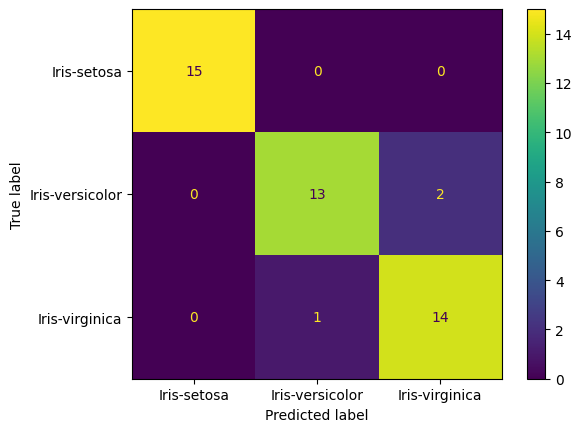

In [52]:
create_confusion_matrix_plot(model, X_test, y_test)

In [53]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    mlflow.set_tracking_uri("http://localhost:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Iris Classifier")
        mlflow.set_tags({"tag2":"Logistic Regression", "tag3":"Multiclassification using Ovr - One vs rest class"})
        mlflow.sklearn.log_model(model, "model")
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [54]:
from datetime import datetime
experiment_name = "iris_classifier_latest"+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
#run_name="iris_classifier_run"+str(datetime.now().strftime("%d-%m-%y"))
run_name="iris_classifier_run"+str(datetime.now().strftime("%m/%d/%Y, %H:%M:%S"))
create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png')

Run - iris_classifier_run05/18/2023, 12:37:03 is logged to Experiment - iris_classifier_latest18-05-23


In [55]:
import mlflow
logged_model = 'runs:/3779899ff7aa436187f1552bf4ad2def/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(data))

2023/05/18 12:37:09 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.3.2, required: mlflow==2.3)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- class


In [ ]:
import mlflow
logged_model = 'runs:/3779899ff7aa436187f1552bf4ad2def/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_test))

In [56]:
def create_exp_and_register_model(experiment_name,run_name,run_metrics,model,confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    mlflow.set_tracking_uri("http://localhost:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=run_name) as run:
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
        mlflow.sklearn.log_model(model, "model",registered_model_name="iris-classifier-new")

In [57]:
experiment_name = "iris_classifier_method-100" #+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
run_name="iris_classifier_method-100-run" #+str(datetime.now().strftime("%d-%m-%y"))
create_exp_and_register_model(experiment_name,run_name,run_metrics,model,'confusion_matrix.png')

Registered model 'iris-classifier-new' already exists. Creating a new version of this model...
2023/05/18 12:37:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: iris-classifier-new, version 2
Created version '2' of model 'iris-classifier-new'.


In [58]:
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name="iris-classifier-new",
    version=1,
    stage="Production"
)

<ModelVersion: aliases=[], creation_timestamp=1684393364142, current_stage='Production', description='', last_updated_timestamp=1684393658317, name='iris-classifier-new', run_id='8c88d22514514e75b16ac71a6648f772', run_link='', source='mlflow-artifacts:/884962565998301305/8c88d22514514e75b16ac71a6648f772/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='1'>

In [59]:
mlflow.set_tracking_uri('http://localhost:5000')